In [57]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [108]:
df=pd.read_csv('km.csv')
df.drop('Cluster',axis='columns',inplace=True)
df

,Company,Clients,Rate of Return,Sales,Years
0,A,150,15.4,50400200,18
1,B,144,11.3,42100650,15
2,C,120,9.9,39440420,12
3,D,110,12.5,36500520,16
4,E,100,9.7,40650005,10
5,F,99,15.2,45665230,12
6,G,56,9.2,25978080,8
7,H,120,13.1,37900800,12
8,I,122,12.4,42560000,13
9,J,142,14.6,48900090,15


TypeError: 'str' object is not callable

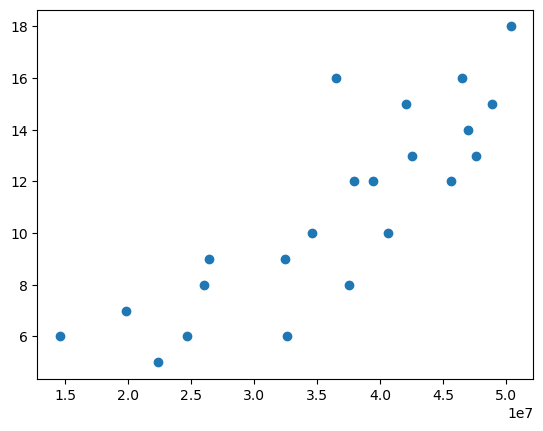

In [109]:
plt.scatter(df['Sales'],df['Years'])
plt.xlabel('sales')
plt.ylabel('years')

In [ ]:
df

In [110]:
sse=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit(df[['Sales']],df[['Years']])
    sse.append(km.inertia_)
    

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [111]:
sse

[2209106969017515.0,
 592037259976708.9,
 224213367050134.38,
 146011912970134.38,
 71530009383545.83,
 47699524529566.67,
 28906012900816.668,
 17315321788741.668,
 12788514422954.168]

In [112]:
scaler=MinMaxScaler()
scaler.fit(df[['Sales']])
df['Sales']=scaler.transform(df[['Sales']])
scaler.fit(df[['Years']])
df['Years']=scaler.transform(df[['Years']])

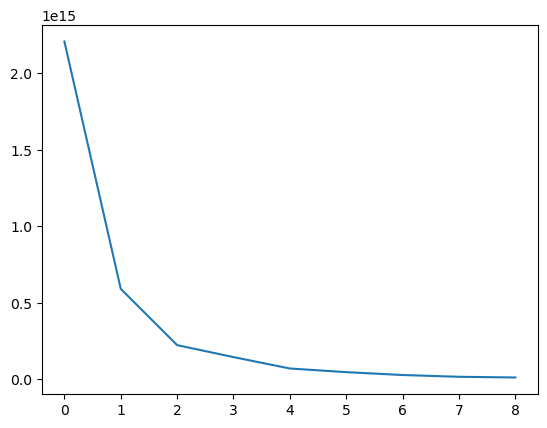

In [113]:
plt.plot(sse)

In [101]:
km=KMeans(n_clusters=2)
#km.fit(df[['Sales']],df[['Years']])


In [102]:
y_predicted=km.fit_predict(df[['Sales']],df[['Years']])
df['clusters']=y_predicted

In [103]:
df0=df[df['clusters']==0]
df1=df[df['clusters']==1]

In [104]:
km.cluster_centers_

array([[24847200.        ],
       [42669621.07142857]])

IndexError: index 1 is out of bounds for axis 1 with size 1

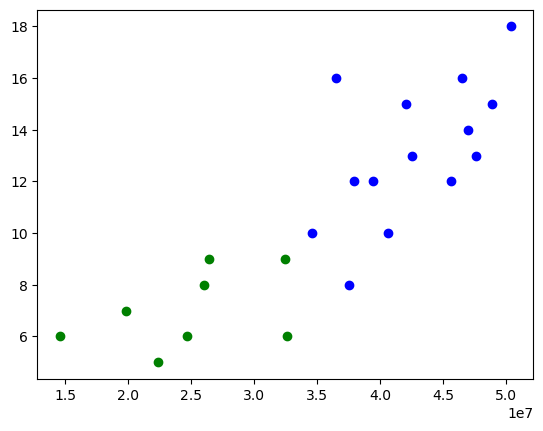

In [105]:
plt.scatter(df0['Sales'],df0['Years'],color="green")
plt.scatter(df1['Sales'],df1['Years'],color="blue")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="red",marker='+')
